# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, KRX, TEST


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_241217.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [11]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded


In [12]:
#k200.portfolio_data
#k200.get_names()

In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

## KRX

In [14]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [17]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded


In [18]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500TR
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [19]:
#PM.review_universe('UV_WTR')

In [20]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

In [21]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [22]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [71]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite=True
)
fund.download(**kw) if WidgetUniverse.values(0) else None

64 tickers set


100%|███████████████████████████████████████████████████████████████| 64/64 [00:28<00:00,  2.28it/s]

28.1 secs elapsed, 0.5 secs paused (1.8%)
Max error of conversions: 6.69e-05
... done
64 securities from 2008-11-28 to 2024-12-31 downloaded.
funds_prices_241231.csv saved
REMINDER: 0 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices updated
Execution time of download: 28.26 secs


In [7]:
#fund.portfolio_data['universe']

### Case: Cost

In [23]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded


In [24]:
tickers = {k:v for k,v in fund.security_names.items() if 'TDF2045' in v}
tickers = list(tickers.keys())

In [25]:
tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
1) K55234DF2988: IBK로우코스트TDF2045증권자투자신탁[혼합-재간접형]종류C-Re
2) K55223BT1757: KB온국민TDF2045증권투자신탁(주식혼합-재간접형)C-퇴직e

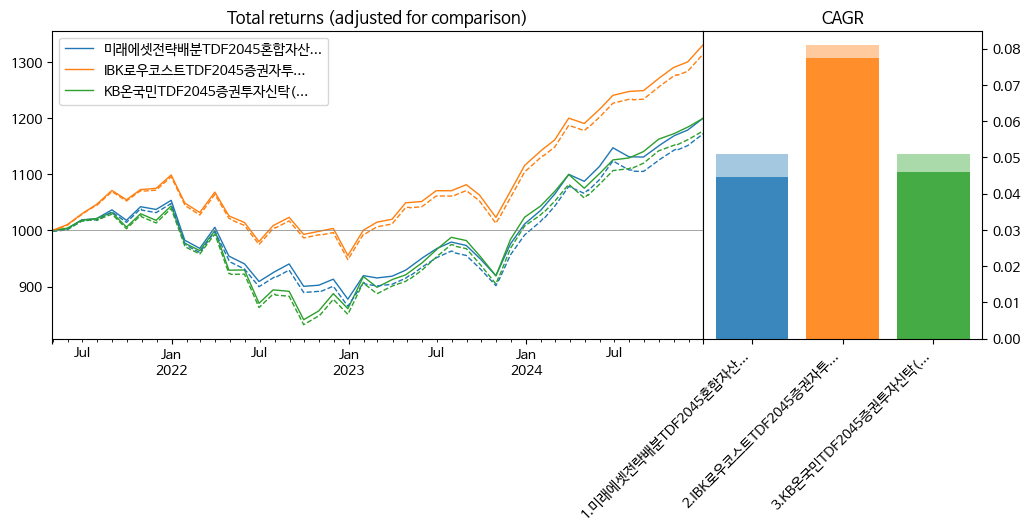

In [26]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [27]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [28]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded


In [29]:
#liq.get_names()

In [30]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.82it/s]

2.4 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-01-20 downloaded.
krx_liq_prices_250120.csv saved
df_prices updated
Execution time of download: 3.27 secs


## Additional Data

### Cost

*Check missing cost data*

In [29]:
PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_241217.csv loaded
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [30]:
fd = FundDownloader.create(fund)
#fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
fd.export_cost('UV_FUND')

Data for 64 funds loaded.


,universe,ticker,buy,sell,fee,tax
0,UV_FUND,K55234DF2657,0.0,0.0,0.410,0.0
1,UV_FUND,K55234DF2459,0.0,0.0,0.410,0.0
2,UV_FUND,K55301BU6139,0.0,0.0,0.600,0.0
3,UV_FUND,K55105BU1161,0.0,0.0,0.420,0.0
4,UV_FUND,K55210BU2385,0.0,0.0,0.500,0.0
...,...,...,...,...,...,...
59,UV_FUND,K55105BT9936,0.0,0.0,0.540,0.0
60,UV_FUND,K55223BT1096,0.0,0.0,0.360,0.0
61,UV_FUND,K55301BU6113,0.0,0.0,0.570,0.0
62,UV_FUND,K55101BT4402,0.0,0.0,0.439,0.0


### Financial Ratio

In [31]:
WidgetUniverse

In [32]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [35]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

In [36]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [37]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-01-03
Price: 2022-01-03 ~ 2025-01-20


# Performance

In [4]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, KRX, TEST


In [5]:
pf_list = ['MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412']
pm = PM(pf_list)

MMT_2407:
200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Transaction record to 2025-01-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded

WTR_2407:
6 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Transaction record to 2024-11-20 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Transaction record to 2024-12-18 loaded



In [6]:
#pm.load('LIQ')
pm.load(['TDF_2406','HANA_2408'])

TDF_2406:
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2025-01-15 loaded

HANA_2408:
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



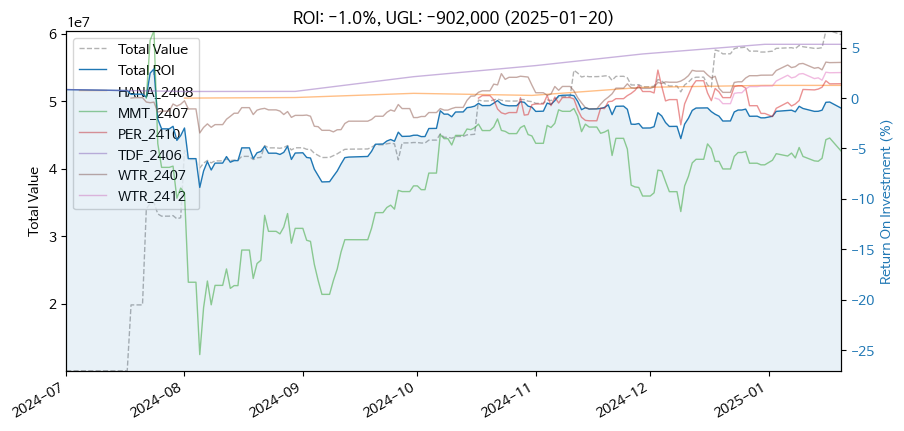

In [7]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [8]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [9]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TDF_2406,HANA_2408,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-06-19,2024-08-01,2024-06-19
end,2025-01-20,2025-01-20,2025-01-20,2025-01-20,2024-12-31,2024-12-31,2025-01-20
buy,"42,593,500","12,249,820","10,049,835","5,783,200","10,000,000","9,990,000","90,666,355"
sell,"26,824,951","2,621,865","437,755",0.0,0.0,0.0,"29,884,571"
value,"13,528,500","9,802,940","9,968,002","5,929,870","10,533,942","10,116,192","59,879,446"
ugl,"-2,240,049","174,985","355,922","146,670","533,942","126,192","-902,338"
roi,-0.052591,0.014285,0.035416,0.025361,0.053394,0.012632,-0.009952


# Transaction

## MMT

In [10]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded


In [11]:
# run after editting record file
#pf_mmt.update_record()

In [12]:
#pf_mmt.portfolio_data['strategy']

In [13]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-12-16 267260     HD현대일렉트릭  0.975610      -389500  2726500     0.2   
           010130         고려아연  1.000858      2330000  2330000     0.2   
           003230         삼양식품  1.000000     -1458000  2187000     0.2   
           000150           두산  0.963303      2725000  2725000     0.2   
           298040        효성중공업  0.985808      2290000  2290000     0.2   
           012450    한화에어로스페이스  1.040650     -2152501        0     0.0   
           064350         현대로템  1.026943     -2316000        0     0.0   
           079550       LIG넥스원  1.004130     -2130700        0     0.0   
2025-01-16 267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           000150           두산  1.000000            0  2880000     0.2   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           298040        효성중공업  0.997872     -2350000        0     0.0   

                   weight*      date*  
date       ticker                      
2024-12-16 267260    0.222 2024-12-17  
           010130    0.190 2024-12-17  
           003230    0.178 2024-12-17  
           000150    0.222 2024-12-17  
           298040    0.187 2024-12-17  
           012450    0.000 2024-12-17  
           064350    0.000 2024-12-17  
           079550    0.000 2024-12-17  
2025-01-16 267260    0.209 2025-01-17  
           003230    0.165 2025-01-17  
           000150    0.206 2025-01-17  
           012450    0.191 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           298040    0.000 2025-01-17

*daily transactions for book keeping*

In [14]:
pf_mmt.get_cash_history(cumsum=False, date_actual=True)

,buy,sell
date*,,
2024-07-22,14255518,0
2024-08-22,6159324,4321649
2024-09-26,0,2819812
2024-09-27,2825103,0
2024-10-08,3072111,3348589
2024-11-11,3038510,3805898
2024-12-17,7345267,8431189
2025-01-17,5899213,4048551


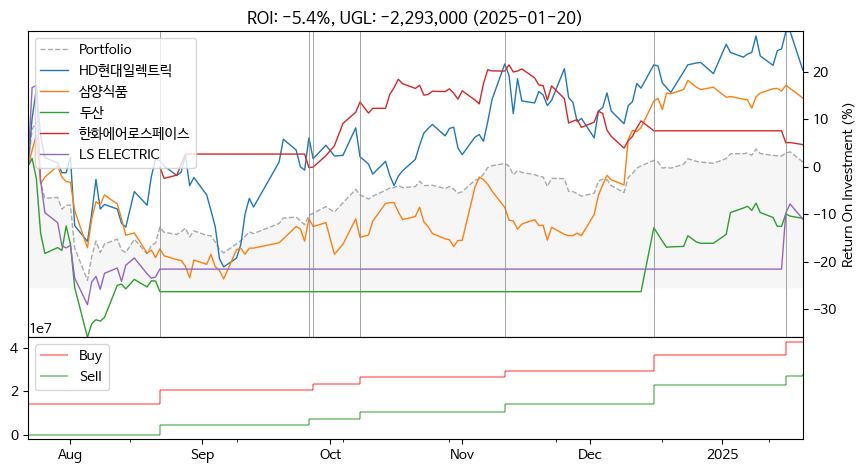

In [24]:
pf_mmt.plot(total=False)

In [18]:
date = None
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-01-20, 42595050, 26775690, 13528500, -2290860, -0.053782316330416746


start    2024-07-22
end      2025-01-20
buy      42,595,050
sell     26,775,690
value    13,528,500
ugl      -2,290,860
roi       -0.053782
dtype: object

In [20]:
pf_mmt.valuate(date, total=False)

,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,
267260,2024-07-22,2025-01-20,"2,826,103","706,201","2,695,000","575,098",0.203495
003230,2024-07-22,2025-01-20,"3,694,134","2,017,289","2,211,000","534,154",0.144595
012450,2024-08-22,2025-01-20,"8,042,584","5,773,878","2,642,500","373,795",0.046477
079550,2024-08-22,2025-01-15,"2,702,098","2,855,946",NaN,"153,847",0.056936
489790,2024-09-27,2024-11-08,"281,719","353,500",NaN,"71,780",0.254794
298040,2024-12-16,2025-01-20,"2,290,083","2,345,684",0.0,"55,601",0.024279
000150,2024-07-22,2025-01-20,"5,325,194","1,915,276","2,830,000","-579,917",-0.108901
010130,2024-12-16,2025-01-20,"2,330,085","1,702,867",0.0,"-627,218",-0.269182
011790,2024-10-08,2024-12-13,"3,072,112","2,438,414",NaN,"-633,698",-0.206274


In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)

Liquidation set to None
5 tickers selected by Total return from 2024-01-15 to 2025-01-13
Weights of tickers determined by Equal weights.
New cash inflows of 5,000,000
Mean absolute error of weights: 3 %
ROI: -4.9%, UGL: -2,291,016 (2025-01-20)
All transactions saved to pf_k200_momentum_250120.csv


In [26]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-01-16 267260     HD현대일렉트릭  417500            0    7     0.2    0.209   
           003230         삼양식품  770000            0    3     0.2    0.165   
           000150           두산  288000            0   10     0.2    0.206   
           012450    한화에어로스페이스  382000            6    7     0.2    0.191   
           010120  LS ELECTRIC  215000           15   15     0.2    0.230   
           010130         고려아연  853000           -1    0     0.0    0.000   
           298040        효성중공업  470000           -5    0     0.0    0.000   
2025-01-20 267260     HD현대일렉트릭  385000            2    9     0.2    0.195   
           003230         삼양식품  737000            2    5     0.2    0.207   
           000150           두산  283000            3   13     0.2    0.207   
           012450    한화에어로스페이스  377500            2    9     0.2    0.191   
           010120  LS ELECTRIC  210000            2   17     0.2    0.201   

                       date*  
date       ticker             
2025-01-16 267260 2025-01-17  
           003230 2025-01-17  
           000150 2025-01-17  
           012450 2025-01-17  
           010120 2025-01-17  
           010130 2025-01-17  
           298040 2025-01-17  
2025-01-20 267260 2025-01-20  
           003230 2025-01-20  
           000150 2025-01-20  
           012450 2025-01-20  
           010120 2025-01-20

## KRX
*simulation*

In [48]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [20]:
pf_krx.view_record(-2)

No transaction record imported


In [21]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [10]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [11]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-01-16 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-11 loaded


In [12]:
#pf_per.portfolio_data

In [13]:
pf_per.view_record(-2)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                             
2024-10-17 010060   OCI홀딩스  0.992504       933800   933800    0.20    0.189   
           003030   세아제강지주  0.995439       986700   986700    0.20    0.200   
           009970  영원무역홀딩스  1.006742       979000   979000    0.20    0.198   
           016380     KG스틸  0.986364      1016400  1016400    0.20    0.206   
           047040     대우건설  1.000000      1019940  1019940    0.20    0.207   
2024-11-11 010060   OCI홀딩스  1.006689      -358800   478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200   386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200   428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020   500840    0.05    0.052   
           047040     대우건설  0.993122      -461645   508900    0.05    0.053   
           088350     한화생명  1.001745       515700   515700    0.05    0.054   
           078930       GS  1.002404       499200   499200    0.05    0.052   
           111770     영원무역  0.996264       481800   481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750   519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600   427600    0.05    0.044   
           001450     현대해상  1.000000       505750   505750    0.05    0.053   
           009900     명신산업  1.008715       495720   495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000   520000    0.05    0.054   
           000270       기아  1.010684       468000   468000    0.05    0.049   
           024110     기업은행  1.002059       509950   509950    0.05    0.053   
           005850      에스엘  1.014354       501600   501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560   514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650   518650    0.05    0.054   
           005380      현대차  1.007160       419000   419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700   416700    0.05    0.043   

                       date*  
date       ticker             
2024-10-17 010060 2024-10-17  
           003030 2024-10-17  
           009970 2024-10-17  
           016380 2024-10-17  
           047040 2024-10-17  
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [14]:
pf_per.valuate()

buy      1.225027e+07
sell     2.617050e+06
value    9.838570e+06
ugl      2.053544e+05
roi      1.676326e-02
Name: 2025-01-16 00:00:00, dtype: float64

In [15]:
#pf_per.update_record()
#pf_per.view_record(-2)

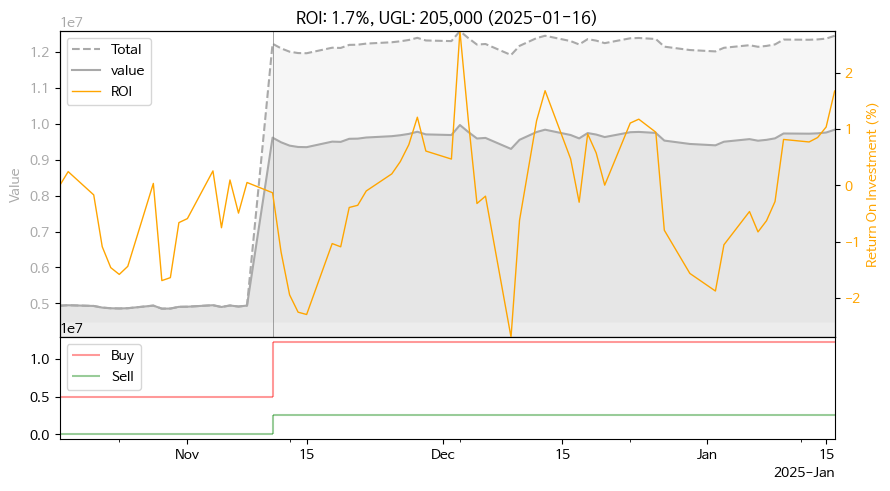

In [16]:
pf_per.plot()

In [17]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

ERROR: KeyError "['016380', '009900'] not in index"


In [18]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-1)

Liquidation set to None
20 tickers selected by Financial Ratio from 2024-10-16 to 2024-12-16
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 5 %
Tickers 009900, 016380 added to universe
Tickers 009900, 016380 added to universe
Result from 2024-10-17 to 2025-01-16
Set save=True to save transaction record


name  ratio  transaction     net  weight  weight*  \
date       ticker                                                         
2024-12-16 010060   OCI홀딩스    1.0       -64100  448700    0.05    0.049   
           003030   세아제강지주    1.0            0  359200    0.05    0.039   
           009970  영원무역홀딩스    1.0            0  416500    0.05    0.045   
           047040     대우건설    1.0        10110  481910    0.05    0.053   
           088350     한화생명    1.0        15570  482670    0.05    0.053   
           078930       GS    1.0            0  483600    0.05    0.053   
           111770     영원무역    1.0       -41600  457600    0.05    0.050   
           005830   DB손해보험    1.0            0  412000    0.05    0.045   
           001450     현대해상    1.0        26400  475200    0.05    0.052   
           139130  DGB금융지주    1.0       -69840  480150    0.05    0.052   
           000270       기아    1.0            0  476500    0.05    0.052   
           241560     두산밥캣    1.0       -83100  457050    0.05    0.050   
           005850      에스엘    1.0       -31100  466500    0.05    0.051   
           024110     기업은행    1.0       -29220  482130    0.05    0.053   
           028050    삼성E&A    1.0       477900  477900    0.05    0.052   
           005380      현대차    1.0            0  422000    0.05    0.046   
           383220      F&F    1.0       473400  473400    0.05    0.052   
           316140   우리금융지주    1.0       -31340  470100    0.05    0.051   
           105630     한세실업    1.0       479060  479060    0.05    0.052   
           138930  BNK금융지주    1.0      -132840  476010    0.05    0.052   
           009900      NaN    1.0      -500040       0    0.00    0.000   
           016380      NaN    1.0      1021811       0    0.00    0.000   
           017800   현대엘리베이    1.0      -510300       0    0.00    0.000   

                       date*  
date       ticker             
2024-12-16 010060 2024-12-16  
           003030 2024-12-16  
           009970 2024-12-16  
           047040 2024-12-16  
           088350 2024-12-16  
           078930 2024-12-16  
           111770 2024-12-16  
           005830 2024-12-16  
           001450 2024-12-16  
           139130 2024-12-16  
           000270 2024-12-16  
           241560 2024-12-16  
           005850 2024-12-16  
           024110 2024-12-16  
           028050 2024-12-16  
           005380 2024-12-16  
           383220 2024-12-16  
           316140 2024-12-16  
           105630 2024-12-16  
           138930 2024-12-16  
           009900 2024-12-16  
           016380 2024-12-16  
           017800 2024-12-16

In [42]:
#pf_per.update_record()

## WTR
*modified all weather*

In [42]:
pf = 'WTR_2407'
#pf = 'WTR_2412' # 배현정
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-20 loaded


In [43]:
#pf_wtr.portfolio_data['strategy']
#pf_wtr.update_record()

In [44]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-07-18 069500             KODEX 200   38181           42   42   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112800           14   14   0.167   
           148070          KOSEF 국고채10년  110817           14   14   0.167   
           379800      KODEX 미국S&P500TR   17520           94   94   0.167   
           411060            ACE KRX금현물   15524          106  106   0.167   
           284430        KODEX 200미국채혼합   13405          123  123   0.167   
2024-11-20 069500             KODEX 200   33010            7   49   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14   0.167   
           148070          KOSEF 국고채10년  113034           -1   13   0.167   
           379800      KODEX 미국S&P500TR   18790           -8   86   0.167   
           411060            ACE KRX금현물   17040          -10   96   0.167   
           284430        KODEX 200미국채혼합   12585            4  128   0.167   

                   weight*      date*  
date       ticker                      
2024-07-18 069500    0.166 2024-07-18  
           273130    0.162 2024-07-18  
           148070    0.165 2024-07-18  
           379800    0.169 2024-07-18  
           411060    0.169 2024-07-18  
           284430    0.170 2024-07-18  
2024-11-20 069500    0.168 2024-11-20  
           273130    0.167 2024-11-20  
           148070    0.158 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
           284430    0.169 2024-11-20

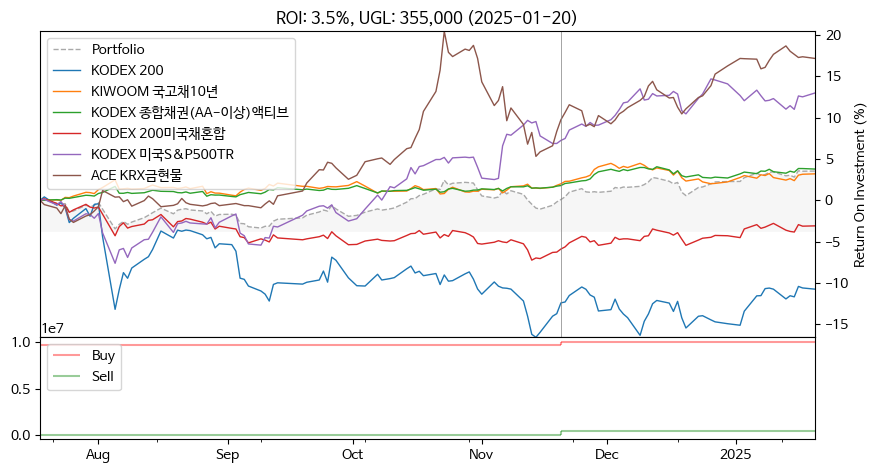

In [45]:
pf_wtr.plot(total=False)

In [46]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-01-20, 10050258, 437605, 9968002, 355349, 0.0353572299787841


start    2024-07-18
end      2025-01-20
buy      10,050,258
sell        437,605
value     9,968,002
ugl         355,349
roi        0.035357
dtype: object

In [29]:
#pf_wtr.performance(metrics=METRICS)

In [37]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [38]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

Liquidation set to None
6 tickers selected by All from 2025-01-20 to 2025-01-20
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: 3.6%, UGL: 365,762 (2025-01-20)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   33010            7   49  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
2025-01-20 069500             KODEX 200   33635            0   49  0.1667   
           379800      KODEX 미국S&P500TR   19890           -3   83  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117065            0   14  0.1667   
           411060            ACE KRX금현물   18310           -6   90  0.1667   
           148070         KIWOOM 국고채10년  114475            0   14  0.1667   
           284430        KODEX 200미국채혼합   12960           -1  128  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           273130    0.167 2024-11-20  
           148070    0.158 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
           284430    0.169 2024-11-20  
2025-01-20 069500    0.167 2025-01-20  
           379800    0.168 2025-01-20  
           273130    0.166 2025-01-20  
           411060    0.167 2025-01-20  
           148070    0.163 2025-01-20  
           284430    0.168 2025-01-20

## LIQ

In [47]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-01-03 loaded


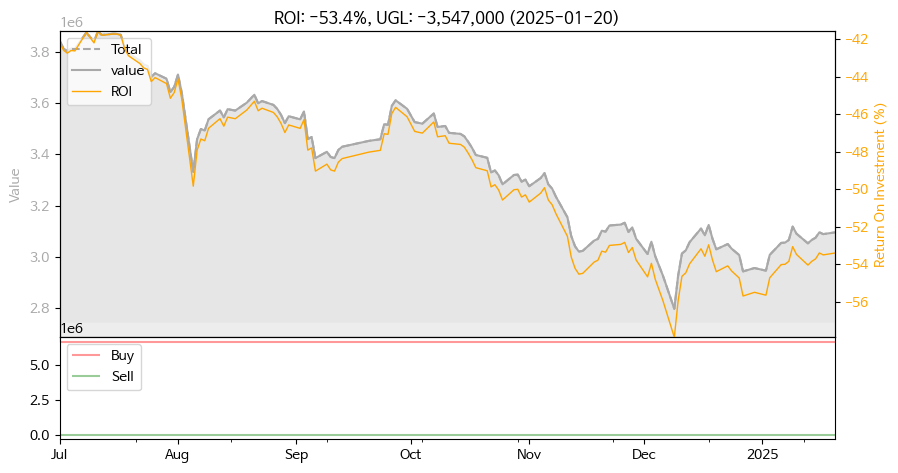

In [48]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [49]:
pf_liq.valuate()

start    2024-01-03
end      2025-01-20
buy       6,642,320
sell            0.0
value     3,095,602
ugl      -3,546,718
roi       -0.533958
dtype: object

In [27]:
pf_liq.view_record()

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-01-03 011780     금호석유  0.750877       342000  342000     NaN    0.051   
           066570     LG전자  0.812245       245000  245000     NaN    0.037   
           035890     서희건설  0.760000       298800  298800     NaN    0.045   
           040420  정상제이엘에스  0.875784       294890  294890     NaN    0.044   
           140520     대창스틸  0.803077       292500  292500     NaN    0.044   
           072990    에이치시티  0.542767       286200  286200     NaN    0.043   
           091580    상신이디피  0.918452       302400  302400     NaN    0.046   
           011200      HMM  0.755977       289850  289850     NaN    0.044   
           002220     한일철강  0.768371       297350  297350     NaN    0.045   
           006650     대한유화  0.832507       181500  181500     NaN    0.027   
           136490       선진  0.524409       292100  292100     NaN    0.044   
           064550    바이오니아  0.707956       297900  297900     NaN    0.045   
           460860     동국제강  0.599797       149784  149784     NaN    0.023   
           040910     아이씨디  0.741803       292800  292800     NaN    0.044   
           024950   삼천리자전거  0.675537       293100  293100     NaN    0.044   
           900070   글로벌에스엠  0.516667       299160  299160     NaN    0.045   
           036580      팜스코  0.523810       298410  298410     NaN    0.045   
           184230  SGA솔루션즈  0.589354       299820  299820     NaN    0.045   
           460850     동국씨엠  0.383273        90275   90275     NaN    0.014   
           016250  SGC E&C  0.409565       276000  276000     NaN    0.042   
           001230    동국홀딩스  0.354766        48088   48088     NaN    0.007   
           049470      SGA  0.528251       299935  299935     NaN    0.045   
           217820    원익피앤이  0.485701       275396  275396     NaN    0.041   
           109960   AP헬스케어  0.218206       598820  598820     NaN    0.090   

                       date*  
date       ticker             
2024-01-03 011780 2024-01-03  
           066570 2024-01-03  
           035890 2024-01-03  
           040420 2024-01-03  
           140520 2024-01-03  
           072990 2024-01-03  
           091580 2024-01-03  
           011200 2024-01-03  
           002220 2024-01-03  
           006650 2024-01-03  
           136490 2024-01-03  
           064550 2024-01-03  
           460860 2024-01-03  
           040910 2024-01-03  
           024950 2024-01-03  
           900070 2024-01-03  
           036580 2024-01-03  
           184230 2024-01-03  
           460850 2024-01-03  
           016250 2024-01-03  
           001230 2024-01-03  
           049470 2024-01-03  
           217820 2024-01-03  
           109960 2024-01-03

## TDF

In [50]:
selected = None

In [51]:
pf_tdf = PM.create_portfolio('TDF_2406', tickers=selected, cost=file_cost)
pf_tdf.view_record()

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [52]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

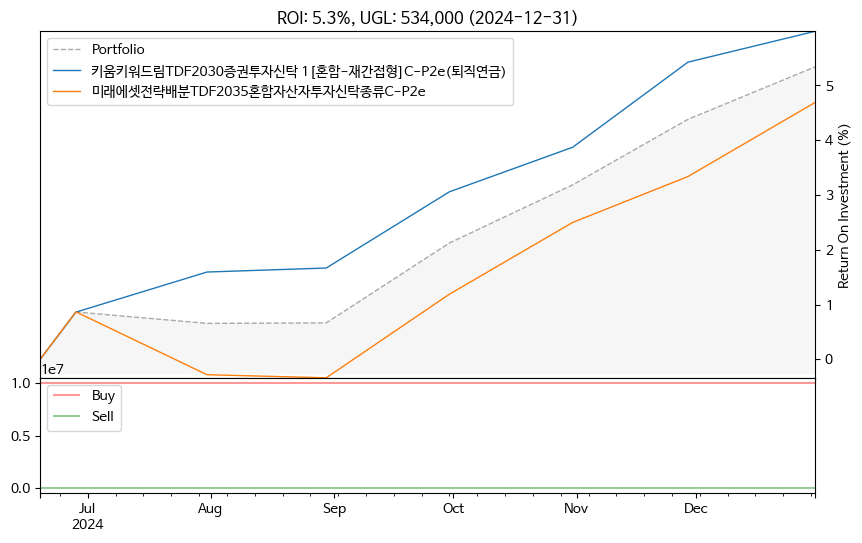

In [53]:
pf_tdf.plot(total=False)

In [56]:
date = None
_ = pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2024-12-31, 10000000, 0.0, 10533942, 533942, 0.05339420000000006


In [57]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [58]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record()

Liquidation set to None
64 tickers selected by All from 2024-12-31 to 2024-12-31
ERROR: check the date as no new transaction
ROI: 5.3%, UGL: 533,942 (2024-12-31)


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

## HANA

In [66]:
#selected = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
selected = None

In [67]:
pf_hana = PM.create_portfolio('HANA_2408', tickers=selected, **kw_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [68]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

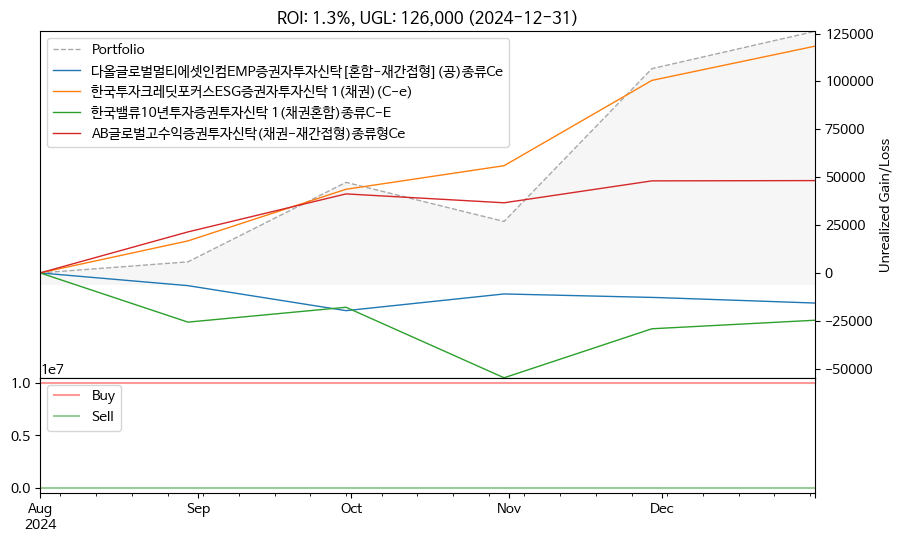

In [69]:
pf_hana.plot(total=False, roi=False)

In [70]:
date = None
_ = pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2024-12-31, 9990000, 0.0, 10116192, 126192, 0.012631831831831919


In [63]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [64]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
64 tickers selected by All from 2022-12-31 to 2024-12-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 2 %
ROI: 0.5%, UGL: 102,525 (2024-12-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                         
2024-08-01 KR5101888398          한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826             한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956             AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946    다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
2024-12-31 K55234DF2657    IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re      1   
...                                                          ...    ...   
           K55105BT9936  삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금)      1   
           K55223BT1096       KB온국민TDF2030증권투자신탁(주식혼합-재간접형)C-퇴직e      1   
           K55301BU6113         미래에셋전략배분TDF2030혼합자산자투자신탁 종류C-P2e      1   
           K55101BT4402    한국투자TDF알아서2030증권투자신탁(주식혼합-재간접형)(C-Re)      1   
           K55370BU1979           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce-P      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
           K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
2024-12-31 K55234DF2657       188540   188539  0.0187    0.019 2024-12-31  
...                              ...      ...     ...      ...        ...  
           K55105BT9936       125106   125106  0.0124    0.012 2024-12-31  
           K55223BT1096       154708   154708  0.0154    0.015 2024-12-31  
           K55301BU6113       202377   202377  0.0201    0.020 2024-12-31  
           K55101BT4402       176931   176930  0.0176    0.018 2024-12-31  
           K55370BU1979       195067   195066  0.0193    0.019 2024-12-31  

[68 rows x 7 columns]

# testing